In [254]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [255]:

import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from cesium import datasets
from cesium import featurize as ft

import scipy
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [263]:
ap = pd.read_csv("../data/AirPassengers.csv", header=None)
ap.columns = ['Date','Passengers']


ap[['Year', 'Month']] = ap['Date'].str.split('-', expand=True)

# Display the DataFrame
print(ap)

# ap.columns.droplevel(0)


import pandas as pd


# Convert the Date column to datetime format
ap['Date'] = pd.to_datetime(ap['Date'])

# Ensure the data is sorted by Date
ap = ap.sort_values(by='Date')

# Extract the Passengers column as a numpy array
passengers = ap['Passengers'].values

print(ap)


        Date  Passengers  Year Month
0    1949-01         112  1949    01
1    1949-02         118  1949    02
2    1949-03         132  1949    03
3    1949-04         129  1949    04
4    1949-05         121  1949    05
..       ...         ...   ...   ...
139  1960-08         606  1960    08
140  1960-09         508  1960    09
141  1960-10         461  1960    10
142  1960-11         390  1960    11
143  1960-12         432  1960    12

[144 rows x 4 columns]
          Date  Passengers  Year Month
0   1949-01-01         112  1949    01
1   1949-02-01         118  1949    02
2   1949-03-01         132  1949    03
3   1949-04-01         129  1949    04
4   1949-05-01         121  1949    05
..         ...         ...   ...   ...
139 1960-08-01         606  1960    08
140 1960-09-01         508  1960    09
141 1960-10-01         461  1960    10
142 1960-11-01         390  1960    11
143 1960-12-01         432  1960    12

[144 rows x 4 columns]


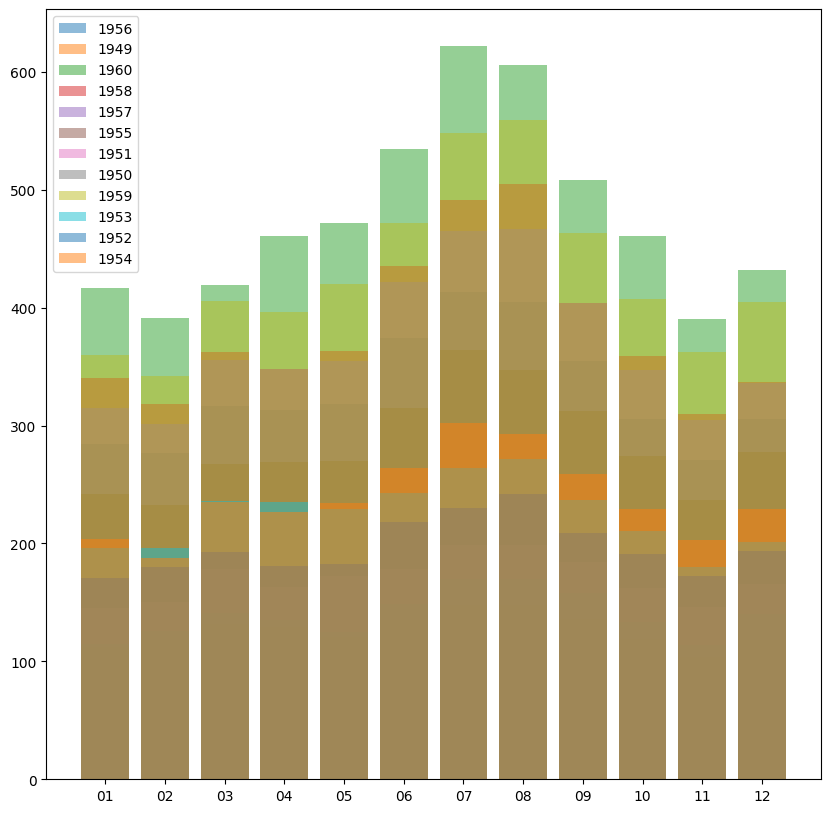

In [264]:
# plt.plot(ap['Month'],ap['Passengers'],'o')

# plt.bar(year_data['Month'], year_data['Passengers'])
plt.figure(figsize=(10, 10))
years = set(ap['Year'])
for year in years:
    plt.bar(ap[ap['Year']==year]['Month'], ap[ap['Year']==year]['Passengers'],alpha=0.5,  label=year)

plt.legend()
plt.show()
# plt.scatter(ap['Month'],ap['Passengers'])
# plt.plot(np.diff(np.log(ap.values[:, 0])))

## Training the Trend in a Machine Learning Model

In [171]:
# from sklearn.models import LinearRegression, MultiOutputRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor




In [265]:
# input selection
X = ap[['Month', 'Year']]
# X = ap
# print(X)

# output selection
y = ap['Passengers']
# print(y)

In [266]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [267]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinPreds = LinReg.predict(X_test)
LinScore = LinReg.score(X_test, y_test)
print(f" Regression Score: {LinScore}")

 Regression Score: 0.8425687950545342


### Logistic Regression

In [268]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000 )
LogReg.fit(X_train, y_train)
LogPreds = LogReg.predict(X_test)
LogScore = LogReg.score(X_test, y_test)
print(f" Regression Score: {LogScore}")

 Regression Score: 0.0


### Random Forest Regression

In [269]:
RF = RandomForestRegressor(n_estimators=20000, max_depth = 4, n_jobs=-1)
RF.fit(X_train, y_train)
RFPreds = RF.predict(X_test)
RFScore = RF.score(X_test, y_test)
print(f" Random Forest Score: {RFScore}")

 Random Forest Score: 0.9144095522446596


In [175]:
RFScore = RF.score(X_test, y_test)
print(f" Random Forest Score: {RFScore}")

 Random Forest Score: 0.9144816516127701


### Artificial Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [12]:
### The dataset to test with 

ap = pd.read_csv("../data/AirPassengers.csv", header=None)
ap.columns = ['Date','Passengers']


ap[['Year', 'Month']] = ap['Date'].str.split('-', expand=True)



# Convert the Date column to datetime format
ap['Date'] = pd.to_datetime(ap['Date'])

# Ensure the data is sorted by Date
ap = ap.sort_values(by='Date')

# Extract the Passengers column as a numpy array
passengers = ap['Passengers'].values

print(passengers.shape)

(144,)


### Train and Test Separation

In [20]:

# Split the dataset into training and testing sets
train_size = int(len(passengers) * 0.67)
test_size = len(passengers) - train_size
train, test = passengers[0:train_size], passengers[train_size:len(passengers)]

In [21]:
# code returning the data as a couplet of data and its labels
def create_dataset(data, look_back=1):
    X, y =[],[]
    for i in range(len(data) - look_back -1):
        a=data[i:(i+look_back)]
        X.append(a)
        y.append(data[i + look_back])
    return np.array(X), np.array(y)


In [22]:
look_back = 10
trainX, trainY = create_dataset(passengers, look_back)
testX, testY = create_dataset(passengers, look_back)

In [25]:
(trainX.shape[0], trainX.shape[1])

# Reshaping the dataset fo ruse in the Artificial Neural Network

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [34]:
model=Sequential()
model.add(LSTM(30, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
133/133 - 3s - 24ms/step - loss: 94164.8672
Epoch 2/500
133/133 - 0s - 3ms/step - loss: 90679.4062
Epoch 3/500
133/133 - 0s - 3ms/step - loss: 88350.9141
Epoch 4/500
133/133 - 0s - 3ms/step - loss: 86184.2031
Epoch 5/500
133/133 - 0s - 4ms/step - loss: 84104.7969
Epoch 6/500
133/133 - 0s - 3ms/step - loss: 82105.0156
Epoch 7/500
133/133 - 0s - 3ms/step - loss: 80165.3516
Epoch 8/500
133/133 - 0s - 3ms/step - loss: 78270.9453
Epoch 9/500
133/133 - 0s - 3ms/step - loss: 76421.0781
Epoch 10/500
133/133 - 0s - 4ms/step - loss: 74616.7266
Epoch 11/500
133/133 - 0s - 3ms/step - loss: 72850.1641
Epoch 12/500
133/133 - 0s - 3ms/step - loss: 71125.1406
Epoch 13/500
133/133 - 0s - 3ms/step - loss: 69440.5078
Epoch 14/500
133/133 - 0s - 3ms/step - loss: 67788.3672
Epoch 15/500
133/133 - 0s - 3ms/step - loss: 66173.4375
Epoch 16/500
133/133 - 0s - 4ms/step - loss: 64597.5273
Epoch 17/500
133/133 - 0s - 3ms/step - loss: 63051.7578
Epoch 18/500
133/133 - 0s - 3ms/step - loss: 61540.7344


## The Following MOdel Does Not Work

In [177]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
DTScore = DT.score(X_test, y_test)
print(f" Decision Tree Score: {DTScore}")


 Decision Tree Score: 0.0


In [270]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),    
    'Random Forest': RandomForestRegressor(n_estimators=20000, max_depth = 4, n_jobs=-1)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

Linear Regression Accuracy: 0.8426
Random Forest Accuracy: 0.9146


## Exercise: now that we have 1 time series, how can we convert it to many samples?

In [232]:

ap = pd.read_csv("../data/AirPassengers.csv", header=None)
ap.columns = ['Date','Passengers']


ap[['Year', 'Month']] = ap['Date'].str.split('-', expand=True)

# Display the DataFrame
print(ap)

# ap.columns.droplevel(0)


import pandas as pd


# Convert the Date column to datetime format
ap['Date'] = pd.to_datetime(ap['Date'])

# Ensure the data is sorted by Date
ap = ap.sort_values(by='Date')

# Extract the Passengers column as a numpy array
passengers = ap['Passengers'].values

# Compute the log returns
ts = np.diff(np.log(passengers))

NSTEPS = 12
ts.shape
vals = np.hstack([np.expand_dims(np.array(ts, dtype = np.float32), axis = 1) for _ in range(NSTEPS )])
ts[0:NSTEPS]
vals.shape
nrow = vals.shape[0]
for lag in range(1, vals.shape[1]):
    vals[:(nrow - lag),lag] = vals[lag:,lag]
    vals[(nrow - lag):, lag] = np.nan
vals
vals = vals[:(vals.shape[0] - NSTEPS + 1), :]
vals.shape
vals[-1]
ts[-NSTEPS:]
vals.shape

        Date  Passengers  Year Month
0    1949-01         112  1949    01
1    1949-02         118  1949    02
2    1949-03         132  1949    03
3    1949-04         129  1949    04
4    1949-05         121  1949    05
..       ...         ...   ...   ...
139  1960-08         606  1960    08
140  1960-09         508  1960    09
141  1960-10         461  1960    10
142  1960-11         390  1960    11
143  1960-12         432  1960    12

[144 rows x 4 columns]


(132, 12)

In [233]:
print(vals)

[[ 0.05218575  0.1121173  -0.02298952 ... -0.13473259  0.12629372
  -0.0257525 ]
 [ 0.1121173  -0.02298952 -0.06402186 ...  0.12629372 -0.0257525
   0.09134978]
 [-0.02298952 -0.06402186  0.10948423 ... -0.0257525   0.09134978
   0.11247798]
 ...
 [-0.11716897  0.11224286  0.02919916 ... -0.02606011 -0.17639855
  -0.0970834 ]
 [ 0.11224286  0.02919916 -0.06437866 ... -0.17639855 -0.0970834
  -0.1672513 ]
 [ 0.02919916 -0.06437866  0.06916336 ... -0.0970834  -0.1672513
   0.10227885]]


 ## Exercise: now that we have the time series broken down into a set of samples, how to featurize?

In [ ]:
measures = [vals[i][0:(NSTEPS - 1)] for i in range(vals.shape[0])]
times = [[j for j in range(NSTEPS - 1)] for i in range(vals.shape[0])]
measures[0]
len(measures[0])


In [ ]:
print(measures)

In [237]:
features_to_use = [
                   "amplitude",
                   "percent_beyond_1_std",
                   "skew",
                   "max_slope",
                   "percent_amplitude"]
fset_ap = ft.featurize_time_series(times=times,
                                    values=measures,
                                    errors=None,
                                    features_to_use=features_to_use,
                                    scheduler = None)

(array([ 9., 11.,  8., 23., 26., 25., 18.,  9.,  2.,  1.]),
 array([-0.56547007, -0.45117751, -0.33688495, -0.22259239, -0.10829984,
         0.00599272,  0.12028528,  0.23457784,  0.3488704 ,  0.46316296,
         0.57745551]),
 <BarContainer object of 10 artists>)

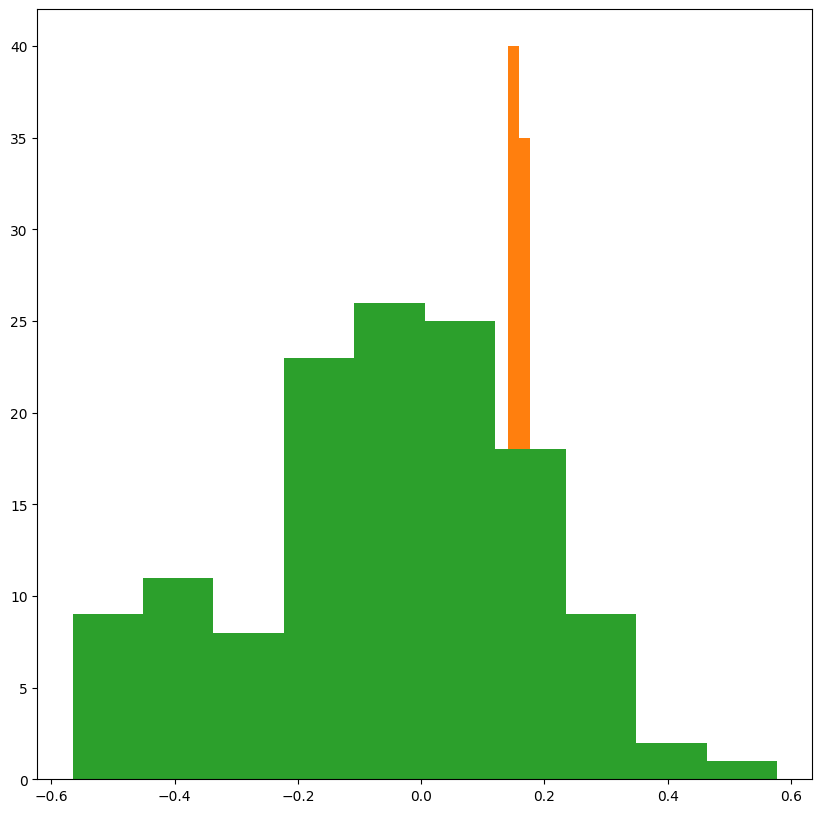

In [238]:
fset_ap.columns = fset_ap.columns.droplevel(-1)
fset_ap.head()
plt.hist(fset_ap.amplitude)
plt.hist(fset_ap.percent_amplitude)
plt.hist(fset_ap['skew'])

## Exercise: Can you fit an XGBRegreessor to this Problem? Lets use ht efirst 100 'time series'as the trianing Data

In [239]:
outcomes = vals[:, -1]
X_train, y_train = fset_ap.iloc[:100, :], outcomes[:100]
X_test, y_test   = fset_ap.iloc[100:, :], outcomes[100:]
X_train.shape
model = xgb.XGBRegressor(n_estimators=20, max_depth=2,
                              random_state=21)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.11648
[1]	validation_0-rmse:0.11906
[2]	validation_0-rmse:0.12401
[3]	validation_0-rmse:0.12917
[4]	validation_0-rmse:0.13594
[5]	validation_0-rmse:0.13500
[6]	validation_0-rmse:0.13542
[7]	validation_0-rmse:0.14053
[8]	validation_0-rmse:0.13899
[9]	validation_0-rmse:0.13818
[10]	validation_0-rmse:0.13772
[11]	validation_0-rmse:0.14335
[12]	validation_0-rmse:0.14281
[13]	validation_0-rmse:0.14573
[14]	validation_0-rmse:0.14678
[15]	validation_0-rmse:0.14869
[16]	validation_0-rmse:0.14782
[17]	validation_0-rmse:0.14889
[18]	validation_0-rmse:0.14710
[19]	validation_0-rmse:0.14991


c:\Users\mhuzaifa\.conda\envs\RETFound\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=21, ...)

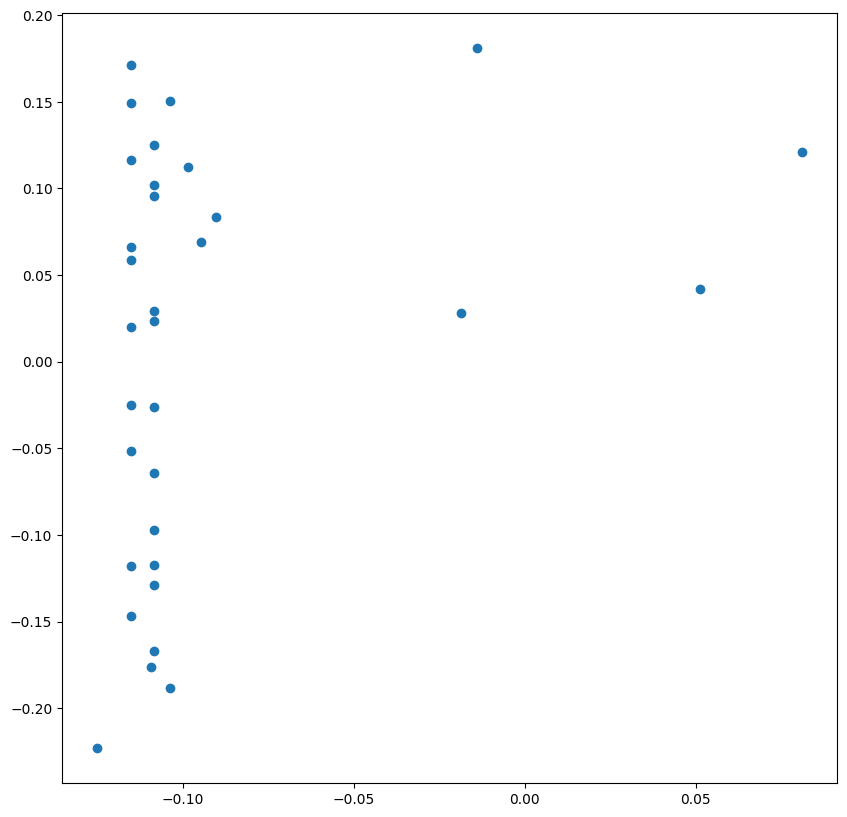

In [240]:
plt.scatter(model.predict(X_test), y_test)

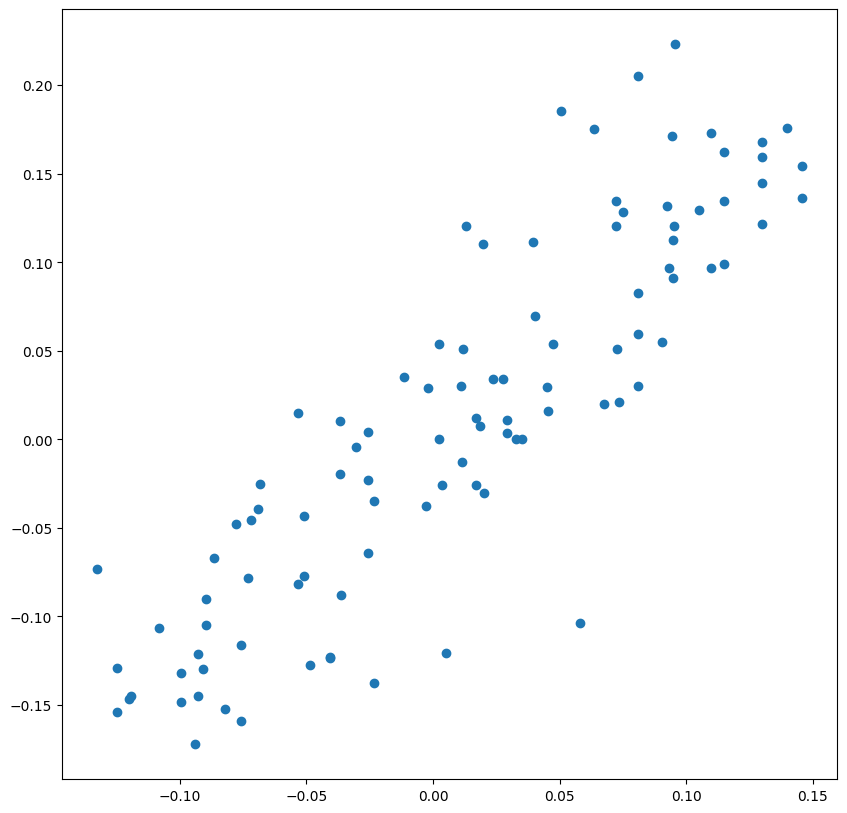

In [241]:
plt.scatter(model.predict(X_train), y_train)

In [242]:
pearsonr(model.predict(X_train), y_train)

PearsonRResult(statistic=0.8742441268730647, pvalue=1.6129630456602289e-32)

In [243]:
pearsonr(model.predict(X_test), y_test)

PearsonRResult(statistic=0.29185585544126086, pvalue=0.1050582975400404)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

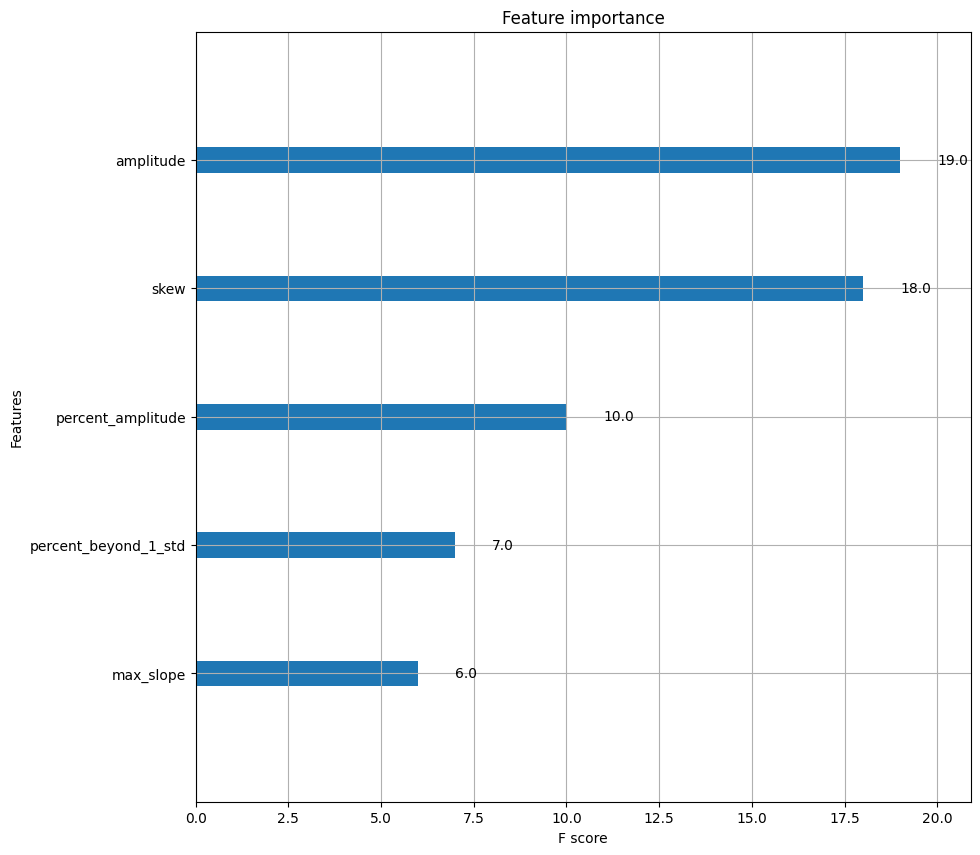

In [244]:


xgb.plot_importance(model)

In [245]:
fset_ap.head()


feature,amplitude,percent_beyond_1_std,skew,max_slope,percent_amplitude
0,0.130513,0.454545,-0.155365,0.261026,0.132121
1,0.130513,0.545455,0.051772,0.261026,0.128461
2,0.130513,0.545455,0.037850,0.261026,0.128461
3,0.130513,0.454545,-0.192651,0.261026,0.132121
4,0.130513,0.454545,-0.233966,0.261026,0.132121


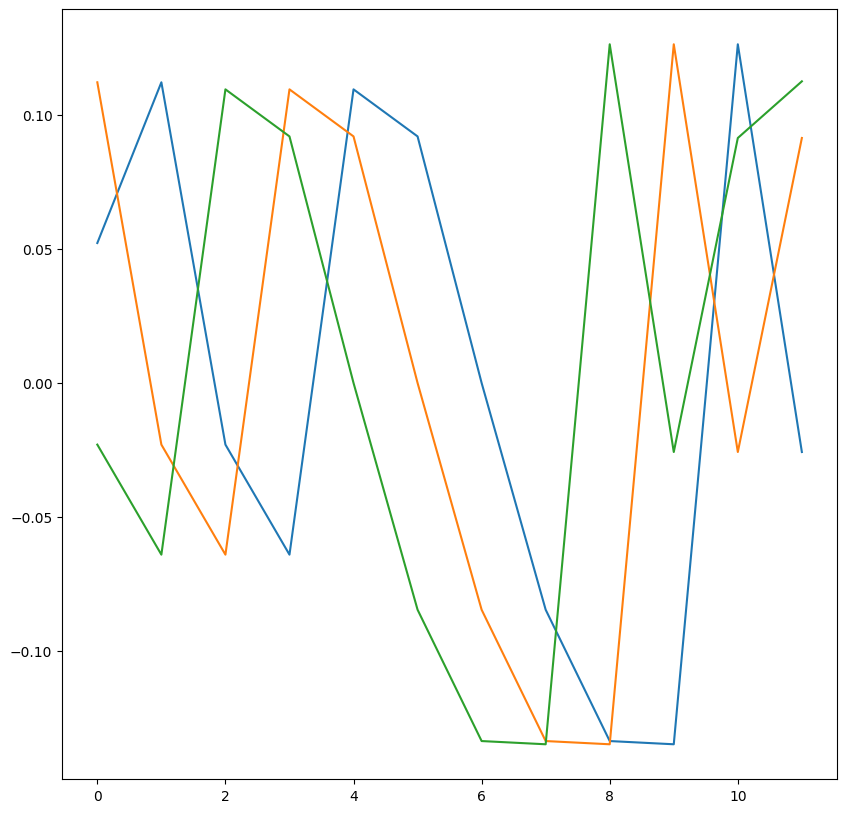

In [246]:
plt.plot(vals[0])
plt.plot(vals[1])
plt.plot(vals[2])

## We need to find a way to generate features that encode positional information now we will generate our own features

In [247]:
vals.shape
feats = np.zeros( (vals.shape[0], 6), dtype = np.float32)
for i in range(vals.shape[0]):
    feats[i, 0] = np.where(vals[i] == np.max(vals[i]))[0][0]
    feats[i, 1] = np.where(vals[i] == np.min(vals[i]))[0][0]
    feats[i, 2] = feats[i, 0] - feats[i, 1]
    feats[i, 3] = np.max(vals[i][-3:])
    feats[i, 4] = vals[i][-1] - vals[i][-2]
    feats[i, 5] = vals[i][-1] - vals[i][-3]
feats[0:3]

array([[10.        ,  9.        ,  1.        ,  0.12629372, -0.15204622,
         0.10898009],
       [ 9.        ,  8.        ,  1.        ,  0.12629372,  0.11710228,
        -0.03494394],
       [ 8.        ,  7.        ,  1.        ,  0.11247798,  0.0211282 ,
         0.13823047]], dtype=float32)

## How do these look compared to the first set of features?

In [248]:
pd.DataFrame(feats[0:3])
X_train, y_train = feats[:100, :], outcomes[:100]
X_test, y_test   = feats[100:, :], outcomes[100:]

In [249]:

model = xgb.XGBRegressor(n_estimators=20, max_depth=2,
                              random_state=21)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)


[0]	validation_0-rmse:0.10240
[1]	validation_0-rmse:0.09587
[2]	validation_0-rmse:0.08990
[3]	validation_0-rmse:0.08540
[4]	validation_0-rmse:0.08037
[5]	validation_0-rmse:0.07273
[6]	validation_0-rmse:0.06910
[7]	validation_0-rmse:0.06729
[8]	validation_0-rmse:0.06523
[9]	validation_0-rmse:0.06458
[10]	validation_0-rmse:0.06254
[11]	validation_0-rmse:0.06116
[12]	validation_0-rmse:0.05971
[13]	validation_0-rmse:0.05868
[14]	validation_0-rmse:0.05754
[15]	validation_0-rmse:0.05678
[16]	validation_0-rmse:0.05680
[17]	validation_0-rmse:0.05624
[18]	validation_0-rmse:0.05562
[19]	validation_0-rmse:0.05535


c:\Users\mhuzaifa\.conda\envs\RETFound\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=21, ...)

PearsonRResult(statistic=0.8912432083942032, pvalue=8.023628117889046e-12)
SignificanceResult(statistic=0.9210599665887582, pvalue=8.047318847312091e-14)
PearsonRResult(statistic=0.989735634772436, pvalue=1.27601476528681e-84)
SignificanceResult(statistic=0.9851371595036995, pvalue=8.636046616063928e-77)


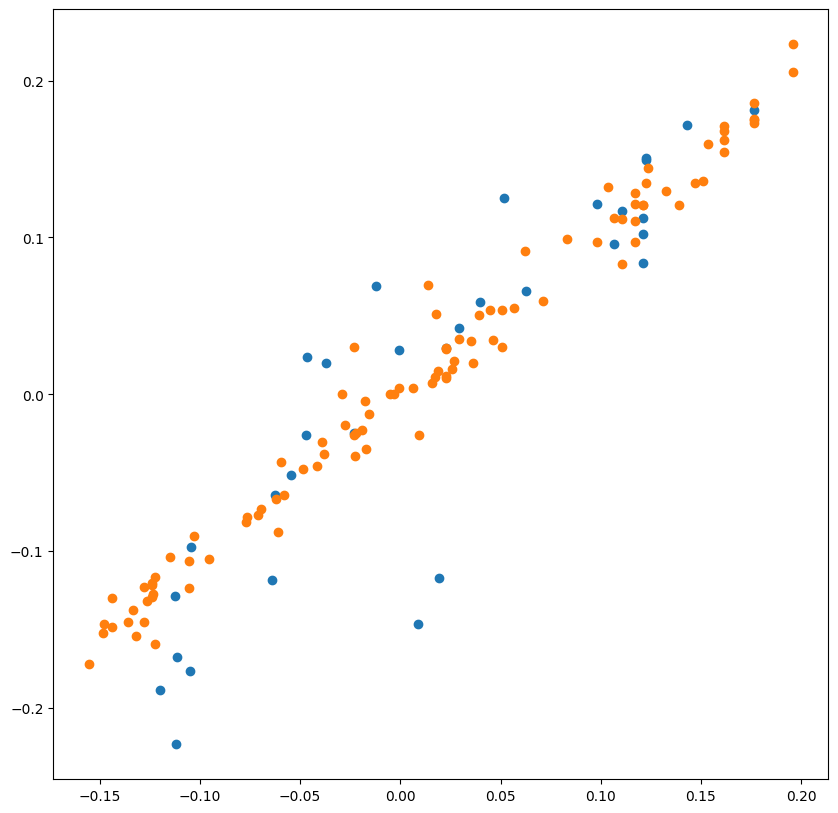

In [250]:
plt.scatter(model.predict(X_test), y_test)
print(pearsonr(model.predict(X_test), y_test))
print(spearmanr(model.predict(X_test), y_test))
plt.scatter(model.predict(X_train), y_train)
print(pearsonr(model.predict(X_train), y_train))
print(spearmanr(model.predict(X_train), y_train))